In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.gridspec import GridSpec
import cmocean

In [2]:
import matplotlib.cm as cm
import matplotlib.colorbar as colorbar
import matplotlib.colors as mcolors

In [3]:
save_path = '/sciserver/filedb06-03/ocean/wenrui_temp/'
rad = xr.open_zarr(save_path+'eras5_heat_flux.zarr')
flx = xr.open_zarr(save_path+'eras5_integrated_flux.zarr')
mass = xr.open_zarr(save_path+'eras5_col_mass.zarr')
clh = xr.open_zarr(save_path+'eras5_tot_heat.zarr')
reg = xr.open_zarr(save_path+'eras5_cloud_wind.zarr')
moi = xr.open_zarr(save_path+'eras5_latent.zarr')
sstm = xr.open_zarr(save_path+'eras5_sst.zarr')

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.38.0 or higher is recommended. You are running version 2.23.0
  warnings.warn(


In [4]:
ds = xr.merge([flx,mass,clh,reg,moi,sstm],combine_attrs  = 'drop_conflicts')

In [6]:
slp = ds.msl

In [10]:
x = np.array(rad.longitude)
y = np.array(rad.latitude)

In [14]:
start = np.searchsorted(x, 190, side='left')
end = np.searchsorted(x, 225, side='right')
xslc = slice(start,end)
start = np.searchsorted(y[::-1], 25, side='left')
end = np.searchsorted(y[::-1], 60, side='right')
yslc = slice(-end,-start)

In [15]:
y[yslc][[1,-1]],x[xslc][[1,-1]]

(array([59.75, 25.  ]), array([190.25, 225.  ]))

In [16]:
mask = 1-np.isnan(ds.sst)

In [51]:
nts = xr.Dataset()
nts['time'] = rad.time
# mask = 1
control = (xr.ones_like(rad['mslhf'])*np.cos(rad.latitude*np.pi/180)*mask).isel(longitude = xslc,latitude = yslc).sum(dim = ('longitude','latitude'))
# slp_t = np.array((ds['msl']*np.cos(rad.latitude*np.pi/180)*mask).isel(longitude = xslc,latitude = yslc).sum(dim = ('longitude','latitude'))/control)

slp_t = np.array((ds['msl']*np.cos(rad.latitude*np.pi/180)*mask).isel(longitude = xslc,latitude = yslc).sum(dim = ('longitude','latitude')).values/control)

slp_t

array([100259.84103625, 100905.87404955, 101356.02261014, 101495.49241952,
       101658.21040925, 101813.63906503, 102146.23411121, 101965.07002753,
       101679.33168409, 101286.44595699, 101260.64219113, 101814.15827192,
       101164.24870516, 100860.94821838, 101151.79203174, 101262.1948949 ,
       101504.602917  , 101819.17054443, 102214.50132924, 102042.54805006,
       101901.778772  , 101505.17348618, 101874.46688875, 101083.53589939,
       101166.08130487, 101532.72330574, 101541.1921792 , 101693.79693197,
       101690.06849383, 102090.58716727, 102124.17060327, 102203.7722081 ,
       101586.95196659, 101455.97856043, 102050.54028788, 101095.01641869,
       100252.68092362, 100894.63314245, 101174.42057278, 101667.68729842,
       101656.06144488, 101780.18623516, 102148.00539959, 102177.25525223,
       101269.54167338, 101562.31415821, 101167.56690178, 100469.81423655,
       101301.0241312 , 101126.2362477 , 101485.76400957, 101156.07404716,
       101903.75957476, 1

In [54]:
nts['slp'] = xr.DataArray(slp_t,dims = 'time')

(14975.0, 17532.0)

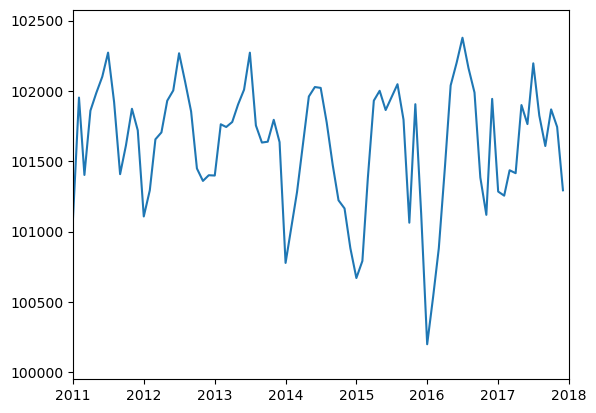

In [64]:
plt.plot(ds.time,nts['slp'])
# plt.plot(ds.time,np.zeros(312),'k:')
plt.xlim(np.datetime64('2011-01'),np.datetime64('2018-01'))

In [56]:
slp_s = nts.slp.groupby('time.month').mean(dim = 'time')

In [66]:
nts['slp_a'] = nts['slp'].groupby('time.month') - slp_s

(14975.0, 17532.0)

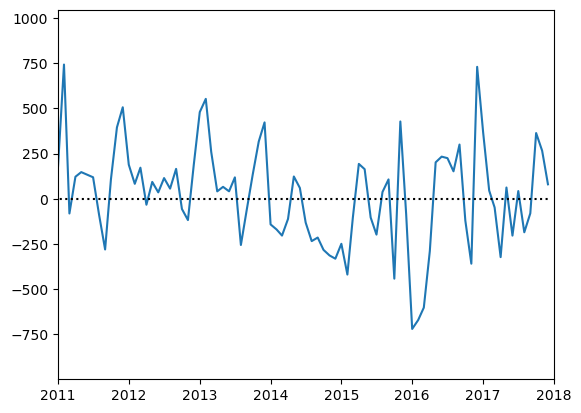

In [67]:
plt.plot(ds.time,nts['slp_a'])
plt.plot(ds.time,np.zeros(312),'k:')
plt.xlim(np.datetime64('2011-01'),np.datetime64('2018-01'))

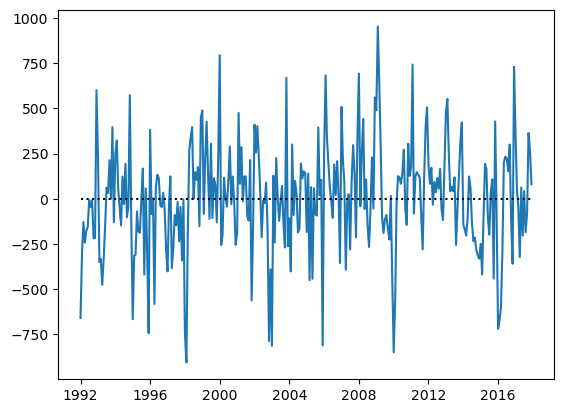

In [78]:
plt.plot(ds.time,nts['slp_a'])
# plt.plot(ds.time,nts['slp_a'].rolling(time = 6,center = True).mean())
plt.plot(ds.time,np.zeros(312),'k:')
# plt.xlim(np.datetime64('2011-01'),np.datetime64('2018-01'))

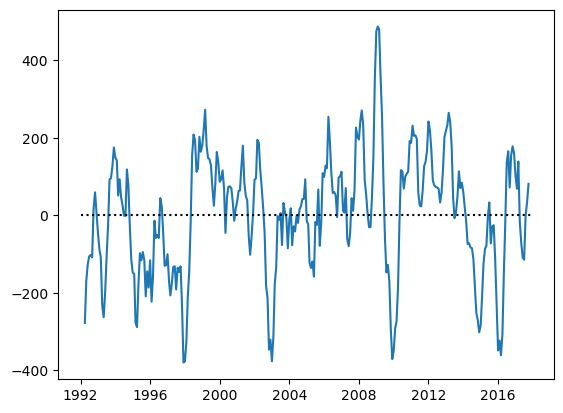

In [77]:
# plt.plot(ds.time,nts['slp_a'])
plt.plot(ds.time,nts['slp_a'].rolling(time = 6,center = True).mean())
plt.plot(ds.time,np.zeros(312),'k:')
# plt.xlim(np.datetime64('2011-01'),np.datetime64('2018-01'))

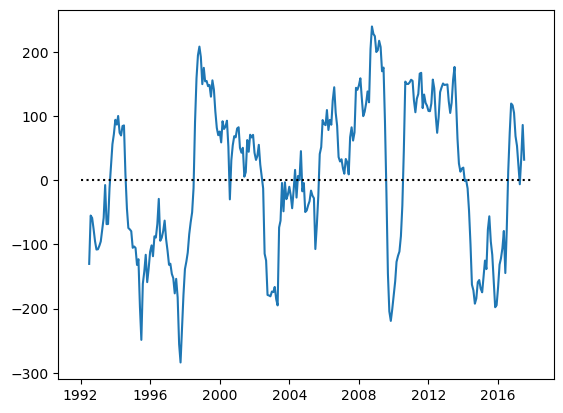

In [76]:
# plt.plot(ds.time,nts['slp_a'])
plt.plot(ds.time,nts['slp_a'].rolling(time = 12,center = True).mean())
plt.plot(ds.time,np.zeros(312),'k:')
# plt.xlim(np.datetime64('2011-01'),np.datetime64('2018-01'))